(2, 0): -1/2
(0, 2): -1/(2*x0_tilde**2)
(0, 0): 0.5*x0_tilde**2 - 1/(8*x0_tilde**2)


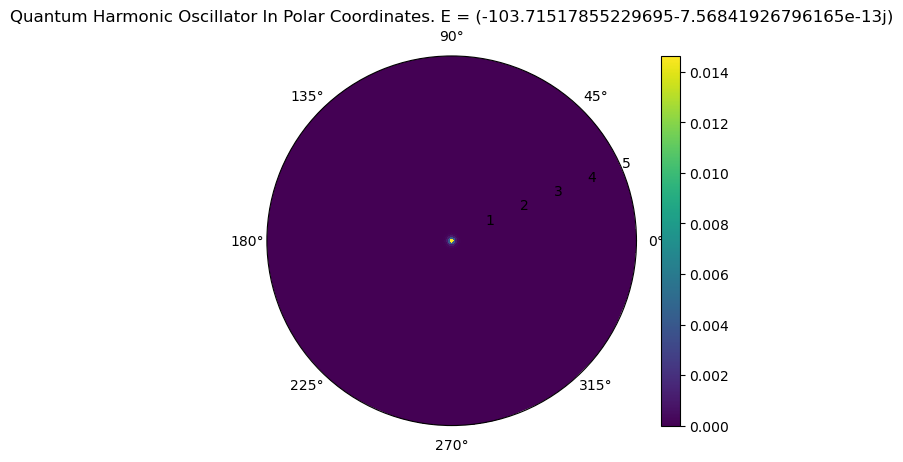

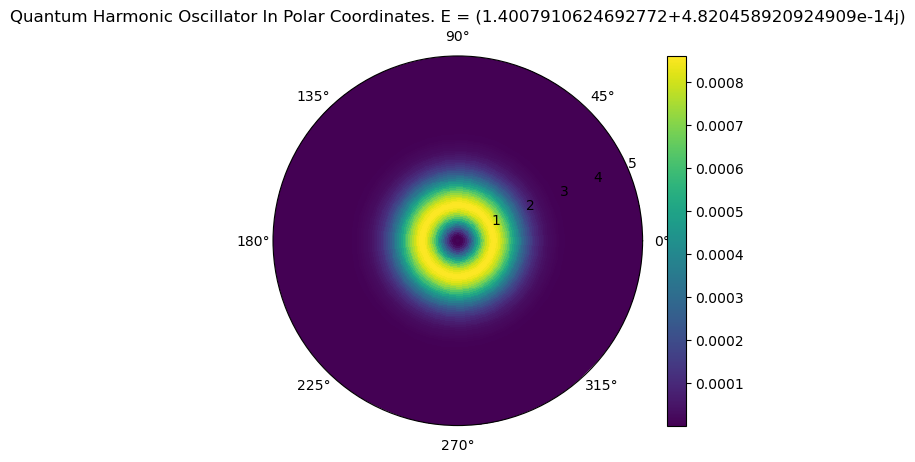

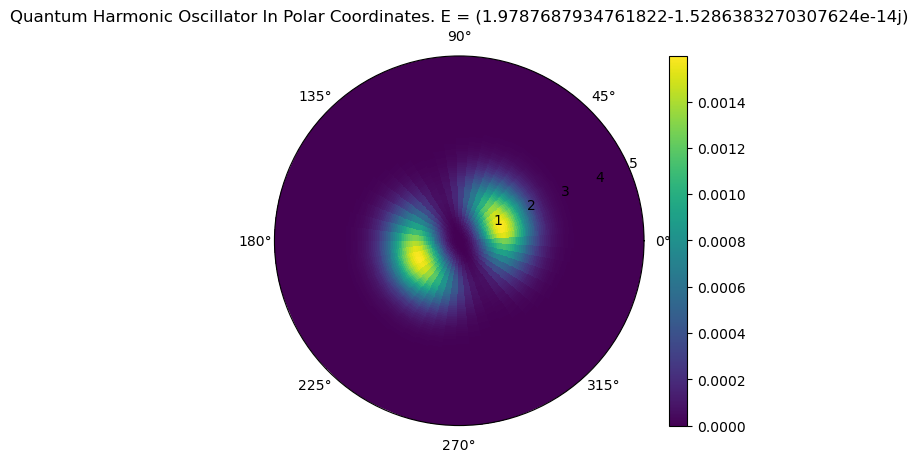

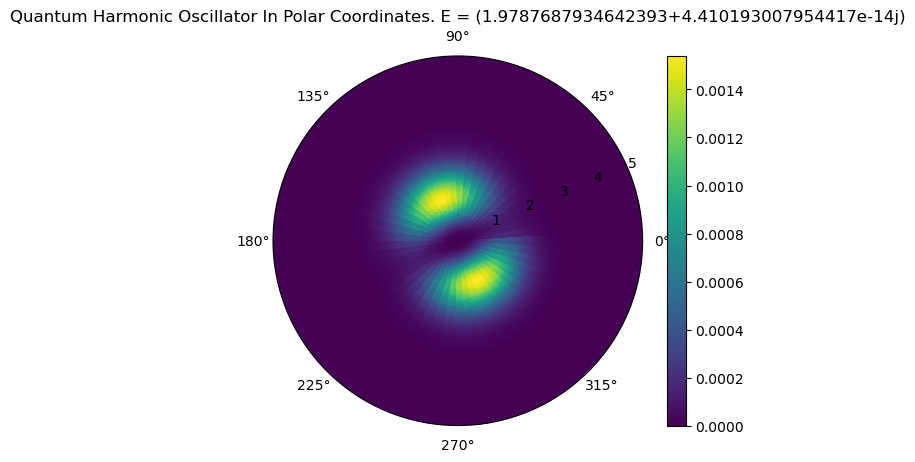

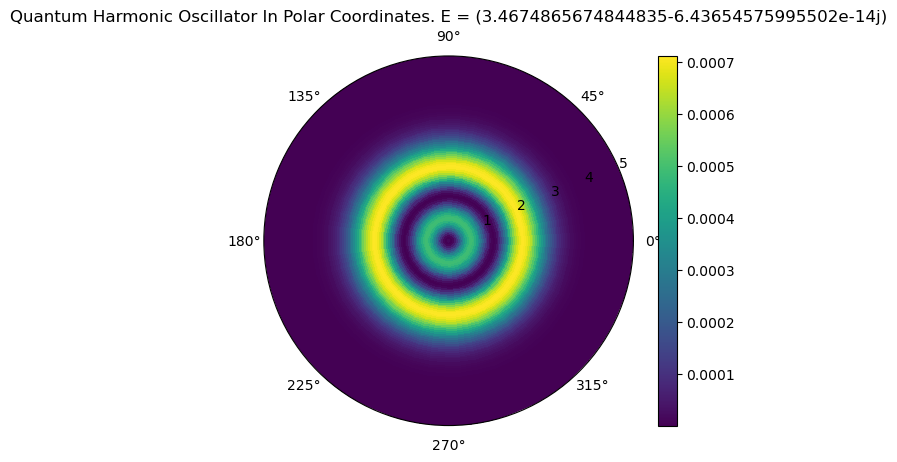

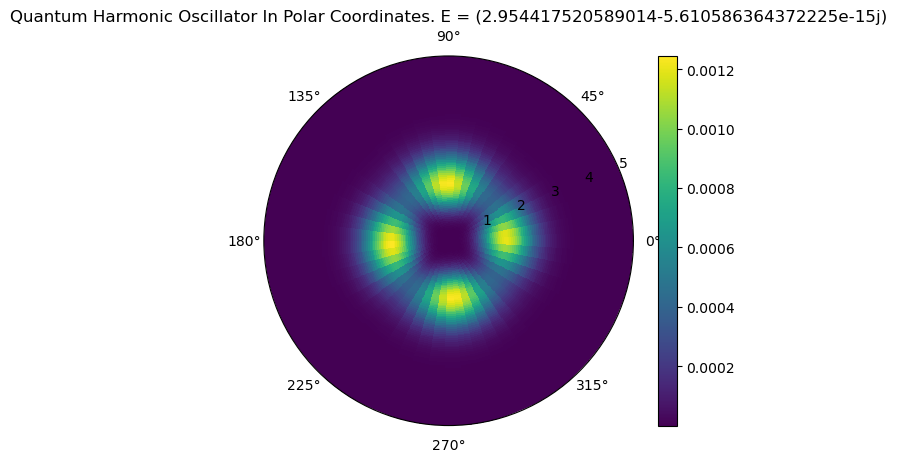

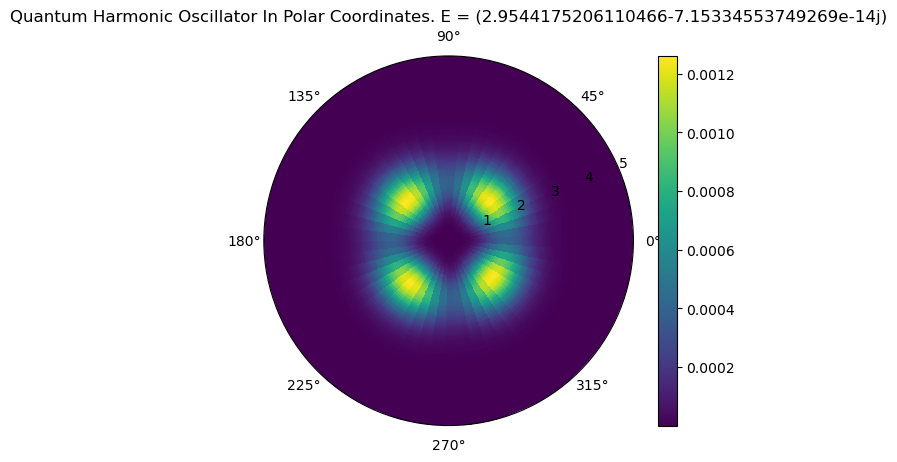

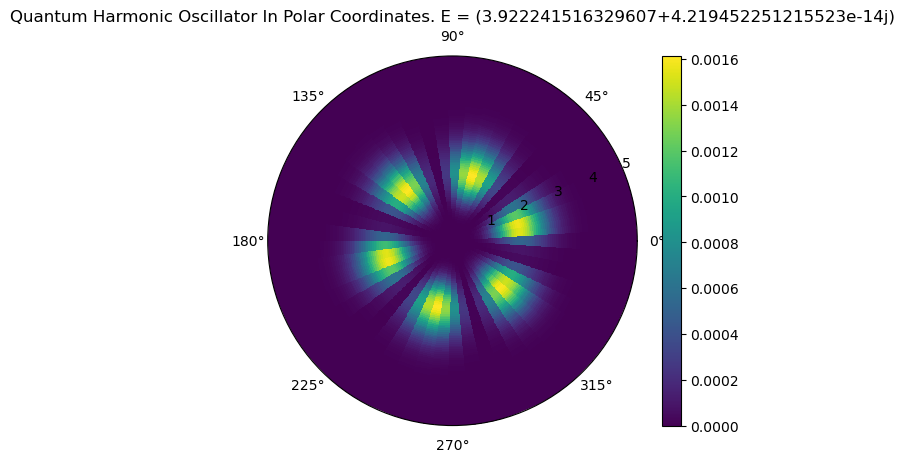

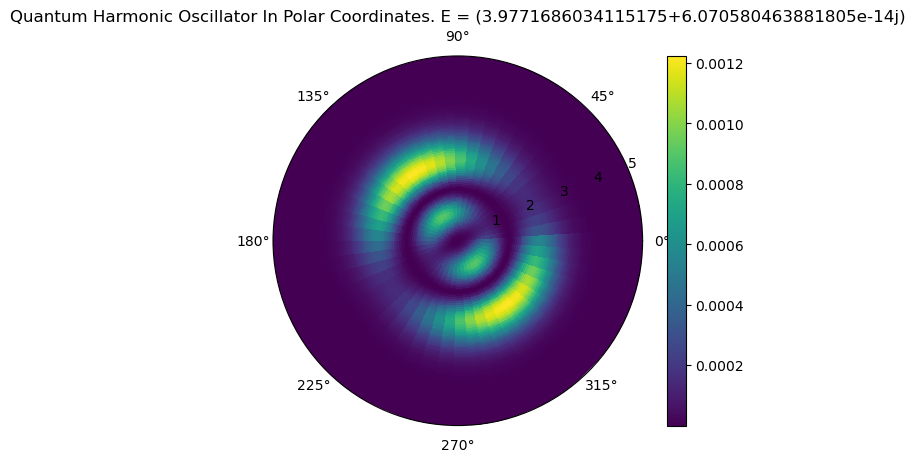

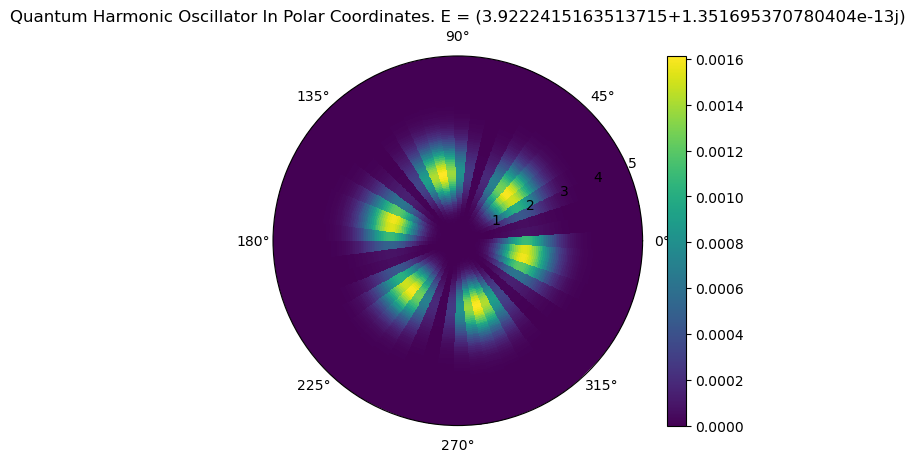

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from src.LinearOperatorSystem import LinearOperatorSystem
from src.BoundaryConditions import periodic_boundary_condition, polar_boundary_condition_2D
from src.MomentumCoordinateChange import get_kinetic_energy, get_kinetic_energy_bundle, vectorize_coefficients

# Coordinate transformation: Used by `get_kinetic_energy` to generate hamiltonian
def polar_to_cartesian(r, theta):
    # Must use sympy operations 
    x = r * sp.cos(theta)
    y = r * sp.sin(theta)
    return x, y

# Get kinetic energy operator in polar coordinates
derivatives, transformed_coordinates = get_kinetic_energy(polar_to_cartesian)

# Add the harmonic potenial
derivatives[(0, 0)] = derivatives.get((0, 0), 0) + 0.5*transformed_coordinates[0]**2

# Print the extracted derivatives
for order, coeff in derivatives.items():
    print(f"{order}: {coeff}")

# Convert symbolic coefficients to numerical functions
vectorized_derivatives = vectorize_coefficients(derivatives, transformed_coordinates)

# Define the coordinate grid 
polar_divisions = [100, 50]
L_r = 5 # Radial distance
d_r = L_r/(polar_divisions[0]-1/2) # Radial spacing
polar_bounds = [(d_r/2, L_r), (0, 2*np.pi)]  # Domain boundaries

polar_boundary_conditions = [periodic_boundary_condition(1), polar_boundary_condition_2D(0, 1)]

k = 10

# Build the polar system 
polar_system = LinearOperatorSystem(polar_bounds, polar_divisions, vectorized_derivatives, polar_boundary_conditions)
energy, psi_polar = polar_system.compute_eigenstates(k)

# Extract coordinate grid
r, azm = polar_system.grid 


# Use provided plotting function for polar
#polar_system.plot_eigenstates(psi_polar, k, complex_tool=lambda x: np.abs(x)**2)


# Plot using polar coordinate system
for ki in range(k):
    fig = plt.figure()
    plt.subplot(projection="polar")
    
    plt.pcolormesh(azm, r, np.abs(psi_polar[..., ki])**2)
    plt.colorbar()
    
    plt.plot(azm, r, color='k', ls='none') 
    plt.title(f"Quantum Harmonic Oscillator In Polar Coordinates. E = {energy[ki]}")
    plt.grid()
    plt.show()

(2, 0): -1/2
(1, 0): -1/(2*x0_tilde)
(0, 2): -x0_tilde**2/2
(0, 0): 0.5*x0_tilde**2 + 1/(8*x0_tilde**2)


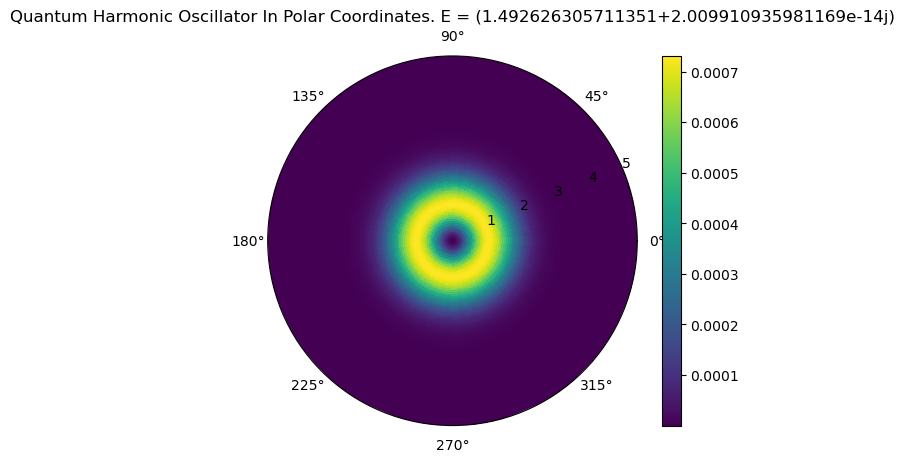

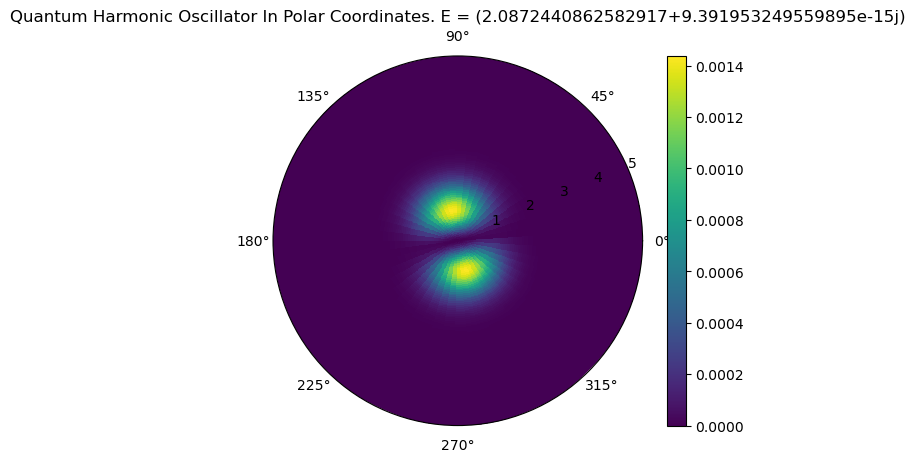

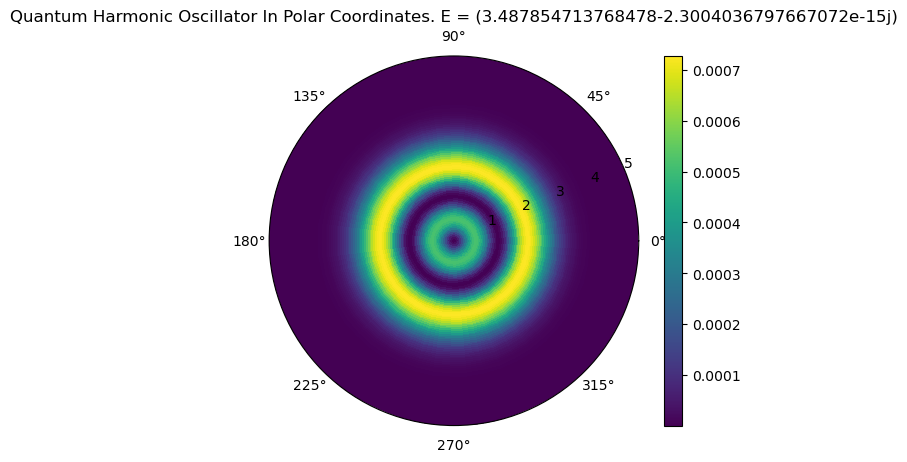

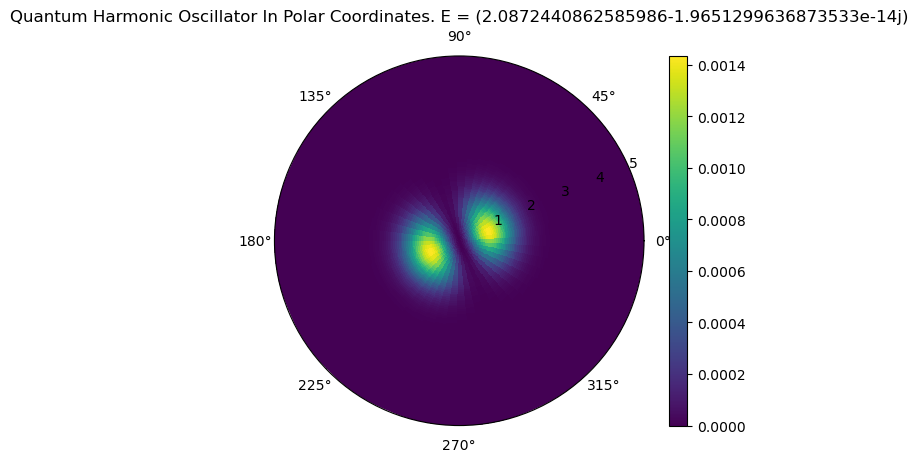

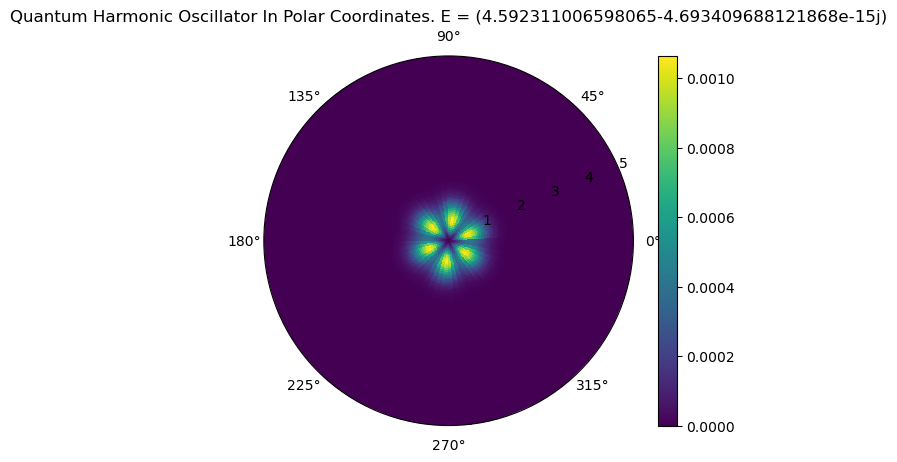

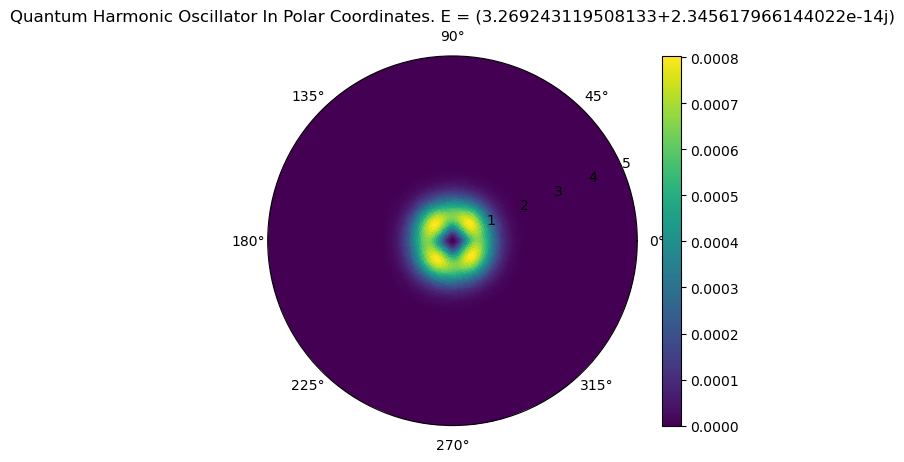

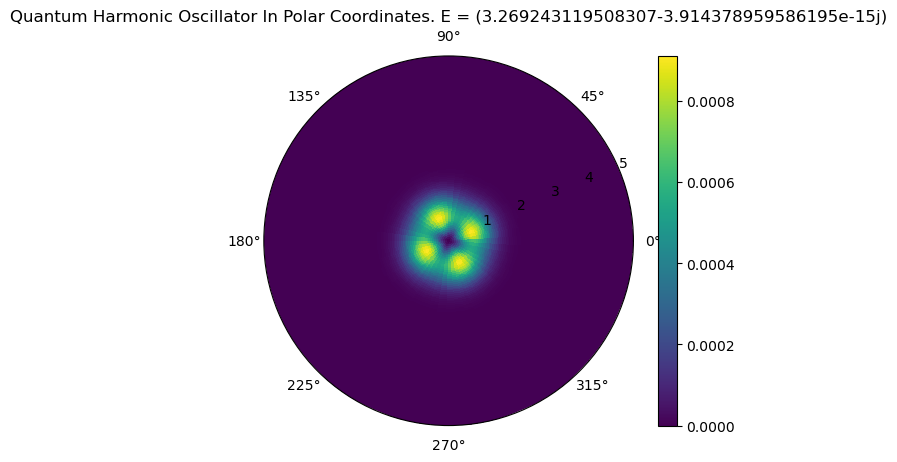

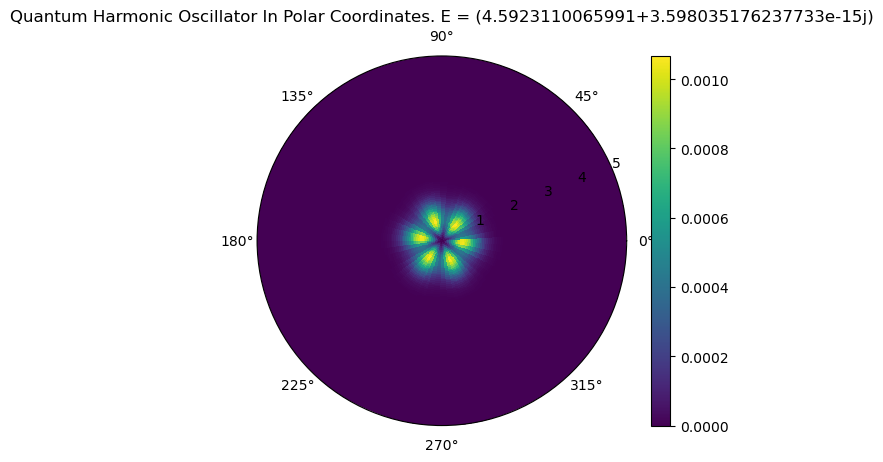

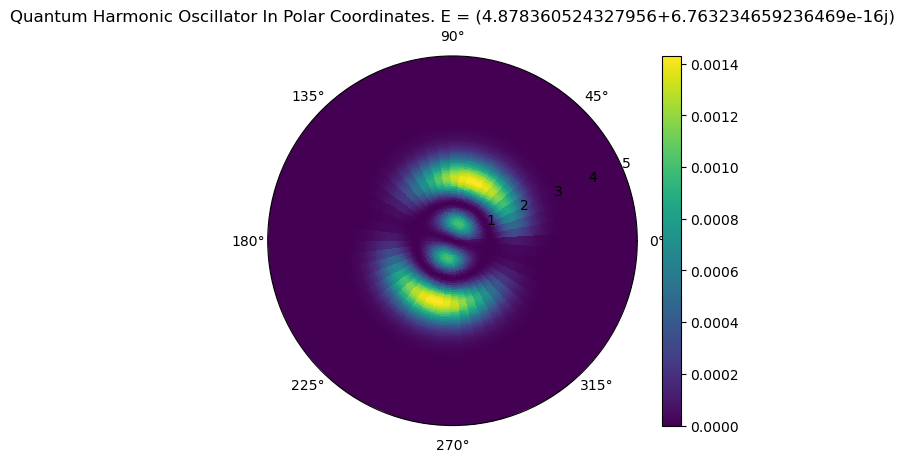

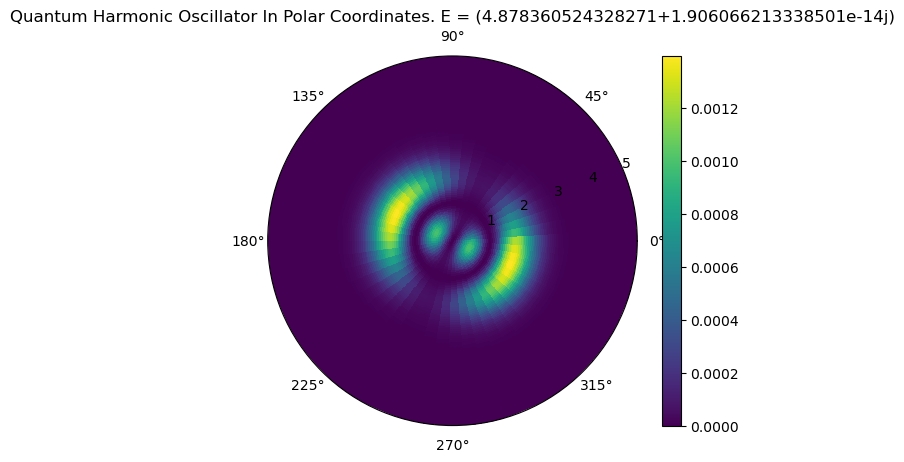

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from src.LinearOperatorSystem import LinearOperatorSystem
from src.BoundaryConditions import periodic_boundary_condition, polar_boundary_condition_2D
from src.MomentumCoordinateChange import get_kinetic_energy_bundle, vectorize_coefficients

# Coordinate transformation: Used by `get_kinetic_energy` to generate hamiltonian
def polar_to_cartesian(r, theta):
    # Must use sympy operations 
    x = r * sp.cos(theta)
    y = r * sp.sin(theta)
    return x, y

# Get kinetic energy operator in polar coordinates
derivatives, transformed_coordinates = get_kinetic_energy_bundle(polar_to_cartesian)

# Add the harmonic potenial
derivatives[(0, 0)] = derivatives.get((0, 0), 0) + 0.5*transformed_coordinates[0]**2

# Print the extracted derivatives
for order, coeff in derivatives.items():
    print(f"{order}: {coeff}")

# Convert symbolic coefficients to numerical functions
vectorized_derivatives = vectorize_coefficients(derivatives, transformed_coordinates)

# Define the coordinate grid 
polar_divisions = [100, 50]
L_r = 5 # Radial distance
d_r = L_r/(polar_divisions[0]-1/2) # Radial spacing
polar_bounds = [(d_r/2, L_r), (0, 2*np.pi)]  # Domain boundaries

polar_boundary_conditions = [periodic_boundary_condition(1), polar_boundary_condition_2D(0, 1)]

k = 10

# Build the polar system 
polar_system = LinearOperatorSystem(polar_bounds, polar_divisions, vectorized_derivatives, polar_boundary_conditions)
energy, psi_polar = polar_system.compute_eigenstates(k)

# Extract coordinate grid
r, azm = polar_system.grid 


# Use provided plotting function for polar
#polar_system.plot_eigenstates(psi_polar, k, complex_tool=lambda x: np.abs(x)**2)


# Plot using polar coordinate system
for ki in range(k):
    fig = plt.figure()
    plt.subplot(projection="polar")
    
    plt.pcolormesh(azm, r, np.abs(psi_polar[..., ki])**2 * r)
    plt.colorbar()
    
    plt.plot(azm, r, color='k', ls='none') 
    plt.title(f"Quantum Harmonic Oscillator In Polar Coordinates. E = {energy[ki]}")
    plt.grid()
    plt.show()

In [9]:
I, J = np.meshgrid(range(3), range(3))

for i, j in I, J:
    print(f'{i}:{j}')

[0 1 2]:[0 0 0]
[0 1 2]:[1 1 1]
[0 1 2]:[2 2 2]
